In [1]:
import tensorflow as tf
import numpy as np

Logistic regression
-------------
- X, Y, W의 shape에 유의할 것
- sigmoid를 사용하여 새로운 hypothesis, cost fucntion을 정의한다.

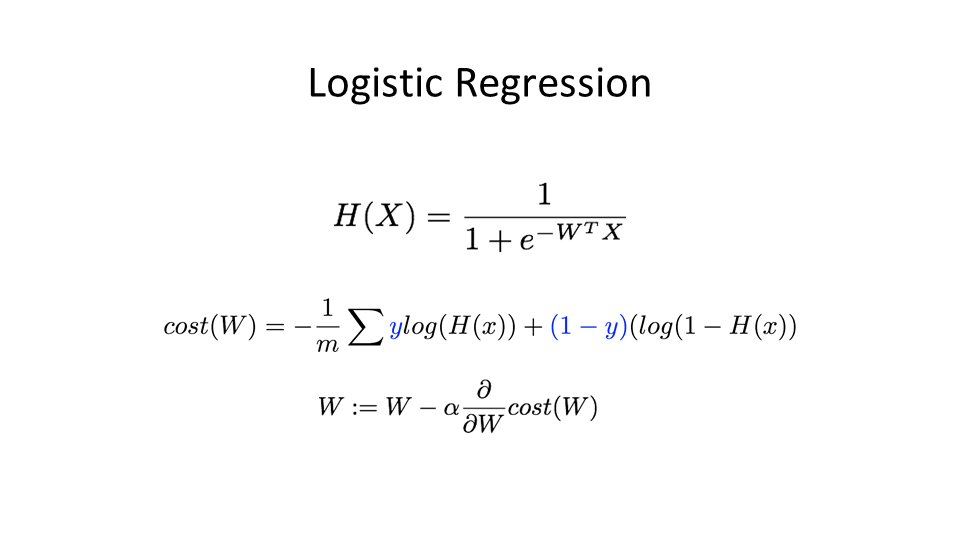

In [2]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 1.7307833
200 0.5715119
400 0.5074139
600 0.4718242
800 0.44758478
1000 0.42857108
1200 0.41232458
1400 0.39775506
1600 0.38433787
1800 0.37180114
2000 0.35999325
2200 0.34882212
2400 0.3382263
2600 0.32816055
2800 0.31858906
3000 0.30948088
3200 0.30080855
3400 0.29254702
3600 0.28467283
3800 0.27716395
4000 0.2699997
4200 0.2631606
4400 0.25662813
4600 0.25038514
4800 0.24441506
5000 0.2387027
5200 0.23323365
5400 0.22799426
5600 0.22297192
5800 0.21815474
6000 0.21353151
6200 0.20909168
6400 0.20482552
6600 0.20072371
6800 0.1967777
7000 0.19297926
7200 0.18932092
7400 0.1857955
7600 0.18239635
7800 0.17911713
8000 0.17595182
8200 0.17289506
8400 0.16994148
8600 0.16708624
8800 0.16432475
9000 0.16165252
9200 0.15906553
9400 0.1565599
9600 0.15413196
9800 0.15177831
10000 0.14949562

Hypothesis:  [[0.03074029]
 [0.15884677]
 [0.30486736]
 [0.78138196]
 [0.93957496]
 [0.9801688 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


Classifying Diabetes
-------------
- diabetes.csv 데이터를 활용하여 당뇨병 여부를 판단한다.
- x_data는 8개 열이므로 X의 shape은 [None, 8] / W의 shape은 [8, 1]

In [4]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('C:/Users/rinseo/Documents/GitHub/DeepLearningZeroToAll/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

(759, 8) (759, 1)
0 0.97422194
200 0.73380584
400 0.68054277
600 0.65738314
800 0.6405061
1000 0.62598956
1200 0.61303777
1400 0.6013964
1600 0.59091467
1800 0.58146954
2000 0.57295144
2200 0.56526166
2400 0.5583115
2600 0.5520215
2800 0.5463204
3000 0.54114515
3200 0.53643954
3400 0.5321536
3600 0.52824324
3800 0.5246693
4000 0.52139693
4200 0.51839536
4400 0.5156375
4600 0.51309913
4800 0.5107587
5000 0.50859725
5200 0.50659776
5400 0.5047452
5600 0.5030261
5800 0.5014283
6000 0.4999411
6200 0.498555
6400 0.49726117
6600 0.49605182
6800 0.49492007
7000 0.49385962
7200 0.49286455
7400 0.4919301
7600 0.49105117
7800 0.49022377
8000 0.4894441
8200 0.48870838
8400 0.48801363
8600 0.48735696
8800 0.4867357
9000 0.48614722
9200 0.48558944
9400 0.4850604
9600 0.48455814
9800 0.4840809
10000 0.48362702

Hypothesis:  [[0.3700318 ]
 [0.9154805 ]
 [0.21602735]
 [0.94834936]
 [0.08354768]
 [0.7647524 ]
 [0.94660914]
 [0.6240097 ]
 [0.24575189]
 [0.53068644]
 [0.7005222 ]
 [0.17214663]
 [0.165432

Exercise
-------------
- CSV reading using tf.decode_csv
- Try other classification data from Kaggle